In [1]:
from py_ball import league

# 1) Re-use the dict you built for requests.get(...)
headers = {
    "User-Agent": (
        "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/18.3 Safari/605.1.15"
    ),
    "Referer": "https://stats.nba.com/",
    "Accept": "application/json, text/plain, */*",
}

# 2) Pass that dict — not the Response — into League(...)
league_id = '00'  # WNBA
franchises = league.League(
    headers=headers,
    endpoint="leaguegamelog",
    league_id=league_id,
    season_id="2023-2024",
    season_type="Playoffs"
)



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

season_df = pd.DataFrame(franchises.data["LeagueGameLog"])

In [3]:
season_df['GAME_DATE'] = pd.to_datetime(season_df['GAME_DATE'])

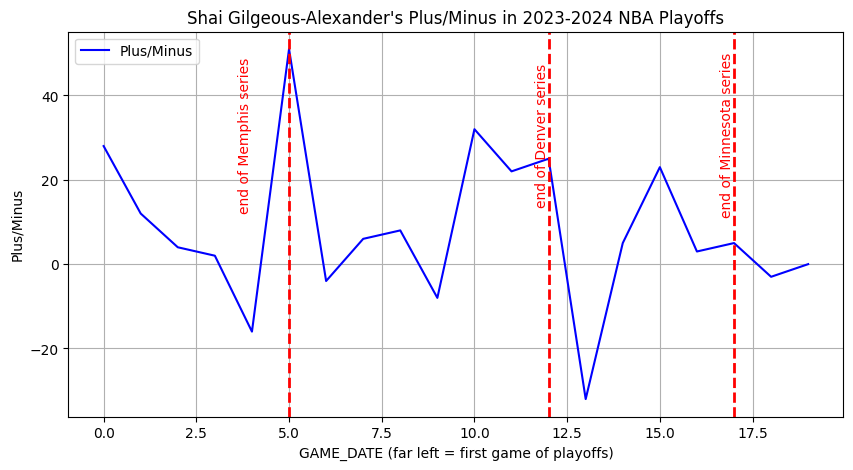

In [4]:
import matplotlib.pyplot as plt

# Filter and prepare the data
shai_df = season_df[season_df.PLAYER_NAME.str.contains("Shai")]
shai_df = shai_df.sort_values(by="GAME_DATE")
plus_minus_series = shai_df["PLUS_MINUS"].reset_index(drop=True)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(plus_minus_series, linestyle='-', color='blue', label="Plus/Minus")

# Add plot details
plt.title("Shai Gilgeous-Alexander's Plus/Minus in 2023-2024 NBA Playoffs")
plt.xlabel("GAME_DATE (far left = first game of playoffs)")
plt.ylabel("Plus/Minus")
plt.grid(True)
plt.legend()

# Add vertical line at index 5
plt.axvline(x=5, color='red', linestyle='--', linewidth=2)
plt.text(4, plus_minus_series.max() * 0.6, 'end of Memphis series', color='red', rotation=90,
         verticalalignment='center', horizontalalignment='right')


plt.axvline(x=12, color='red', linestyle='--', linewidth=2)
plt.text(12, plus_minus_series.max() * 0.6, 'end of Denver series', color='red', rotation=90,
         verticalalignment='center', horizontalalignment='right')





plt.axvline(x=17, color='red', linestyle='--', linewidth=2)
plt.text(17, plus_minus_series.max() * 0.6, 'end of Minnesota series', color='red', rotation=90,
         verticalalignment='center', horizontalalignment='right')

# Show the plot
plt.show()


### PLAYER CLASS

In [193]:
from py_ball import league,player,league_dash

# 1) Re-use the dict you built for requests.get(...)
headers = {
    "User-Agent": (
        "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/18.3 Safari/605.1.15"
    ),
    "Referer": "https://stats.nba.com/",
    "Accept": "application/json, text/plain, */*",
}

# 2) Pass that dict — not the Response — into League(...)
league_id = '00'  # WNBA
players = league_dash.LeagueDash(
    headers=headers,
    endpoint="LeagueDashPlayerStats",
    league_id=league_id,
    season="2024-25",
    season_type="Playoffs",
    measure_type="Advanced"

)



In [198]:
player_metrics = pd.DataFrame(players.data["LeagueDashPlayerStats"])
player_metrics.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'E_OFF_RATING', 'OFF_RATING',
       'sp_work_OFF_RATING', 'E_DEF_RATING', 'DEF_RATING',
       'sp_work_DEF_RATING', 'E_NET_RATING', 'NET_RATING',
       'sp_work_NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT',
       'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'E_TOV_PCT', 'EFG_PCT', 'TS_PCT',
       'USG_PCT', 'E_USG_PCT', 'E_PACE', 'PACE', 'PACE_PER40', 'sp_work_PACE',
       'PIE', 'POSS', 'FGM', 'FGA', 'FGM_PG', 'FGA_PG', 'FG_PCT', 'GP_RANK',
       'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'E_OFF_RATING_RANK',
       'OFF_RATING_RANK', 'sp_work_OFF_RATING_RANK', 'E_DEF_RATING_RANK',
       'DEF_RATING_RANK', 'sp_work_DEF_RATING_RANK', 'E_NET_RATING_RANK',
       'NET_RATING_RANK', 'sp_work_NET_RATING_RANK', 'AST_PCT_RANK',
       'AST_TO_RANK', 'AST_RATIO_RANK', 'OREB_PCT_RANK', 'DREB_PCT_RANK',
       'REB_PCT_RANK', 'TM_TOV_PCT_RANK', 'E_TOV_PCT_

In [208]:
player_metrics[player_metrics["MIN"]>=30].sort_values(by="TS_PCT",ascending=False)[["TS_PCT","PLAYER_NAME"]].head(10)

,TS_PCT,PLAYER_NAME
88,0.708,Jalen Duren
71,0.708,Gary Trent Jr.
65,0.699,Evan Mobley
48,0.681,Davion Mitchell
81,0.653,Ivica Zubac
72,0.651,Giannis Antetokounmpo
195,0.636,Stephen Curry
55,0.636,Derrick White
186,0.634,Rui Hachimura
67,0.632,Fred VanVleet
